# Machine Learning with Fashion-MNIST datasets
By: Wong Jia Hau (1500181)

*FYI: This notebook is uploaded at [http://wjh-fashion-mnist.surge.sh/](http://wjh-fashion-mnist.surge.sh/)*

## Loading the datasets
For this assignment, I will use the default loader provided the authors of Fashion-MNIST.

In [2]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

The loader does not only helps us to load the data into the kernel, it also help us to do the following:
 - flattening data ( for machine learning purpose )
 - partitioning data into training and testing set

In [153]:
print(X_train[0].shape)

(784,)


We can see that the shape of each data is a 1x784 matrix, so it is already flattenized.

In [238]:
x_train_len = len(X_train)
x_test_len = len(X_test)
total = x_train_len + x_test_len
print("Number of training data is", x_train_len)
print("Number of testing data is", x_test_len)
print("Total number of data is ", total)
training_data_percentage = (x_train_len/total*100)
testing_data_percentage = 100 - training_data_percentage
print(f"So there are {training_data_percentage:2.3}% of data is training data")
print(f"And {testing_data_percentage:2.3}% of data is testing data")

Number of training data is 60000
Number of testing data is 10000
Total number of data is  70000
So there are 85.7% of data is training data
And 14.3% of data is testing data


## Let's define the benchmarking function
After that we can use this benchmarking function to benchmark various classifiers to see their accuracy, training time and predicting performance.

In [120]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np


def benchmark(classifier, training_data=X_train, test_data=X_test):
    from datetime import datetime
    time1 = datetime.now()
    cls = classifier()
    name = cls.__class__.__name__
    cls.fit(training_data, y_train)
    time2 = datetime.now()
    training_time = time2 - time1
    predicted = cls.predict(test_data)
    time3 = datetime.now()
    predicting_time = time3 - time2
    accuracy = accuracy_score(y_test, predicted)
    precision = precision_score(y_test, predicted, average='weighted')
    recall = recall_score(y_test, predicted, average='weighted')
    return {
        "classifier" : name,
        "training_time" : training_time, 
        "predicting_time" :predicting_time, 
        "accuracy" : accuracy,
        "precision": precision,
        "recall": recall
    }

def print_benchmark_result(result):
    print("Training data using ", result["classifier"])
    print("Time elapsed for training   = ", result["training_time"])
    print("Time elapsed for prediction = ", result["predicting_time"])
    print(f"Accuracy = {result['accuracy']}")
    print(f"Precision = {result['precision']}")
    print(f"Recall = {result['recall']}")

# Visualizing the data
As mentioned in README, all data are in 28x28 pixels, therefore we need to reshape the data into (28, 28).

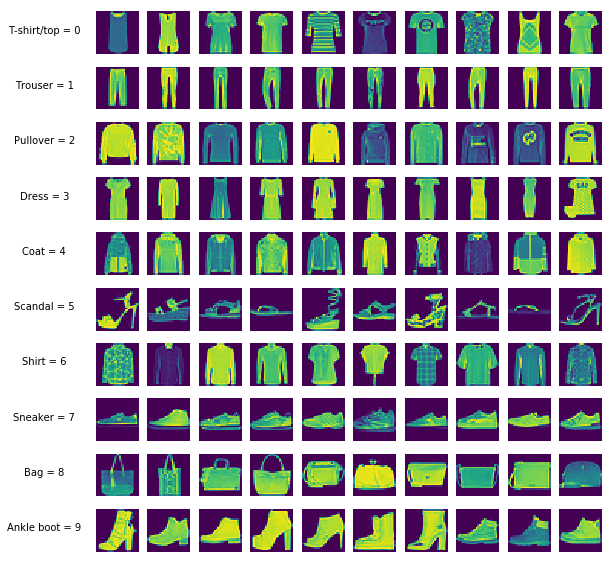

In [108]:
# The lables can be obtain from README.md
LABELS = {
        0: "T-shirt/top",
        1: "Trouser",
        2: "Pullover",
        3: "Dress",
        4: "Coat",
        5: "Scandal",
        6: "Shirt",
        7: "Sneaker",
        8: "Bag",
        9: "Ankle boot"
}
def plot_data_image(x_train_data):
    label_indexes = []
    for i in range(0, 10):
        label_indexes.append(
            [index for index, value in enumerate(y_train) if value == i]
        );
    fig = plt.figure(figsize=(10, 10))
    columns = 10 + 1
    rows = 10
    for i, labels in enumerate(label_indexes):
        for j in range(columns):
            ax = fig.add_subplot(rows, columns, i * columns + j + 1)
            ax.axes.xaxis.set_visible(False)
            ax.axes.yaxis.set_visible(False)
            ax.axis('off')
            if j == 0:
                ax.text(0, 0.5,  f'{LABELS[i]} = {i}', horizontalalignment='center')
                continue
            plt.imshow(x_train_data[labels[j]].reshape(28, 28))
    plt.axis('off')
    plt.show()
plot_data_image(X_train)

# Training using different classifier
In this section we will train the data using some popular classifier and benchmark their performance and accuracy.  
**NOTE** : We will use the default parameter for each classifier.

In [116]:
from sklearn.neighbors import KNeighborsClassifier
r_KNeighborsClassifier = benchmark(KNeighborsClassifier)
print_benchmark_result(r_KNeighborsClassifier)

Training data using  KNeighborsClassifier
Time elapsed for training   =  0:00:17.280291
Time elapsed for prediction =  0:13:18.969113
Accuracy = 0.8554
Precision = 0.8578152450755355
Recall = 0.8554


In [31]:
from sklearn.tree import DecisionTreeClassifier
r_DecisionTreeClassifier = benchmark(DecisionTreeClassifier)
print_benchmark_result(r_DecisionTreeClassifier)

Training data using  DecisionTreeClassifier
Time elapsed for training   =  0:00:49.124785
Time elapsed for prediction =  0:00:00.022530
Accuracy = 0.791
Precision = 0.7927035097838143
Recall = 0.791


In [30]:
from sklearn.naive_bayes import GaussianNB
r_GaussianNB = benchmark(GaussianNB)
print_benchmark_result(r_GaussianNB)

Training data using  GaussianNB
Time elapsed for training   =  0:00:00.864435
Time elapsed for prediction =  0:00:00.953061
Accuracy = 0.5856
Precision = 0.6361313853747838
Recall = 0.5856


In [32]:
from sklearn.neural_network import MLPClassifier
r_MLPClassifier = benchmark(MLPClassifier)
print_benchmark_result(r_MLPClassifier)

Training data using  MLPClassifier
Time elapsed for training   =  0:01:28.564630
Time elapsed for prediction =  0:00:00.088888
Accuracy = 0.84
Precision = 0.850420959641832
Recall = 0.84


In [34]:
from sklearn.ensemble import RandomForestClassifier
r_RandomForestClassifier = benchmark(RandomForestClassifier)
print_benchmark_result(r_RandomForestClassifier)

Training data using  RandomForestClassifier
Time elapsed for training   =  0:00:11.218923
Time elapsed for prediction =  0:00:00.065490
Accuracy = 0.8562
Precision = 0.8551915597971003
Recall = 0.8562


In [39]:
from sklearn.ensemble import AdaBoostClassifier
r_AdaBoostClassifier = benchmark(AdaBoostClassifier)
print_benchmark_result(r_AdaBoostClassifier)

Training data using  AdaBoostClassifier
Time elapsed for training   =  0:02:09.209649
Time elapsed for prediction =  0:00:00.406042
Accuracy = 0.5425
Precision = 0.5612784019025105
Recall = 0.5425


In [35]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
r_QuadraticDiscriminantAnalysis = benchmark(QuadraticDiscriminantAnalysis)
print_benchmark_result(r_QuadraticDiscriminantAnalysis)

/home/hou32hou/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Training data using  QuadraticDiscriminantAnalysis
Time elapsed for training   =  0:00:09.925144
Time elapsed for prediction =  0:00:03.453917
Accuracy = 0.5647
Precision = 0.6307173983502328
Recall = 0.5647


### Side notes
There are actually another popular classifier called `GaussianProcessClassifier`. However this classifier is a memory beast, thus I can't even run the classifier even I have 8GB of RAM.  *However, there are actually some hack to get around with this, but I'm just not sure how to apply it.*

# Graph for comparing various classifiers

In [123]:
def plot_graph(x_title, x_labels, title, benchmark_results):
    recalls = [x["recall"] for x in benchmark_results]
    accuracies = [x["accuracy"] for x in benchmark_results]
    precisions = [x["precision"] for x in benchmark_results]
    training_times = [x["training_time"].total_seconds() for x in benchmark_results]
    predicting_times = [x["predicting_time"].total_seconds() for x in benchmark_results]
    
    bar_width = 0.20
    x_indeces = np.arange(len(x_labels))
    
    # Set title and labels
    fig , ax1 = plt.subplots()
    fig.set_size_inches(8, 8)
    ax1.set_title(title)
    ax1.set_ylabel('Metric scores')
    ax1.set_xlabel(x_title)
    plt.xticks(x_indeces + bar_width, x_labels, rotation='90')
    
    # ax1.set_xticklabels(["null"] + x_labels, rotation=90)
    x_pos = np.arange(len(x_labels))
    
    # Plot recall
    ax1.bar(x_pos, recalls, bar_width, label='Recall', color='lightblue')
    
    # Plot accuracy
    ax1.bar(x_pos + bar_width, accuracies, bar_width, label='Accuracy', color='blue')
    

    # Plot precision
    ax1.bar(x_pos + (bar_width * 2), precisions, bar_width, label='Precision', color='darkblue')
    ax1.legend(bbox_to_anchor=(1.05, 0.85), loc=3)
    for i, v in enumerate(precisions):
        ax1.text(i + bar_width, v, f'{v:.3g}', color='grey')

    # Plot training time
    ax2 = ax1.twinx()
    ax2.set_ylabel('Time (seconds)')
    ax2.plot(x_indeces + bar_width, training_times, color="red", label='Training time', linewidth=5.0)

    # Plot predicting time
    ax2.plot(x_indeces + bar_width, predicting_times, color="yellow", label="Predicting time", linewidth=5.0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=3)
    plt.show()
    print(f"Average training time is {sum(training_times)/len(training_times):2.3}s")
    print(f"Average precision is {sum(precisions)/len(precisions):2.3}%")
    print(f"Max precision is {max(precisions)} when x={x_labels[np.argmax(precisions)]}")

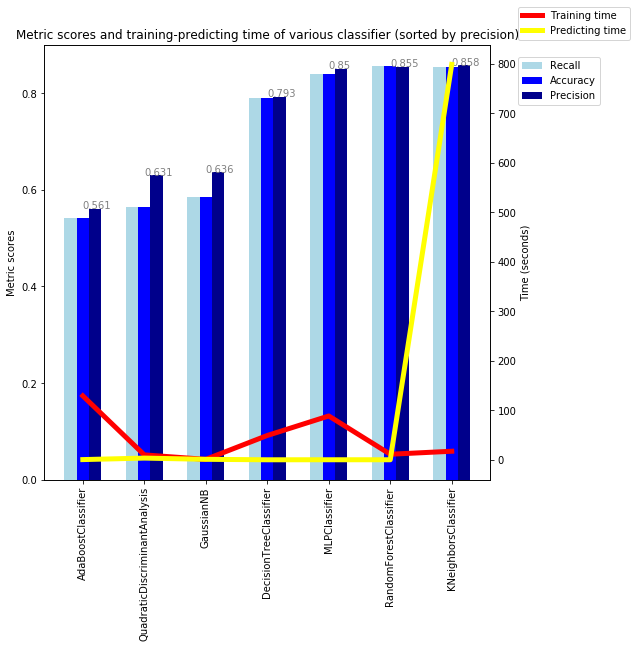

Average training time is 43.7s
Average precision is 0.741%


In [135]:
from operator import itemgetter
benchmark_results = sorted([
    r_KNeighborsClassifier,
    r_DecisionTreeClassifier,
    r_GaussianNB,
    r_MLPClassifier,
    r_RandomForestClassifier,
    r_AdaBoostClassifier,
    r_QuadraticDiscriminantAnalysis
], key=itemgetter('precision'))
classifiers = [x["classifier"] for x in benchmark_results]
plot_graph("", classifiers, "Metric scores and training-predicting time of various classifier (sorted by precision)",
           benchmark_results)

## What can we say about the graph?
From the graph above we can see that the classifier with the best precision is KNeighbors, but we can see that it is using a horrific 700s for predicting test data (over 11 minutes！). On the contrary, all of the other classifier take less than 10s to do the prediction.  
This is because there are actually no training is done for KNeighborsClassifier, all it do is comparing each test data against every train data, thus the terrific predicting time. Meanwhile, the other classifier is really building a model when trained with the data, thus their predicting time is lightning fast.

## Conclusion
From my point of view, I thought that the RandomForestClassifier is the best in this situation, because it have top precision, and one of the least training time and predicting time. **But does that means RandomForest is good for every case?** *The answer is NO.* It reallys depends on how your data looks like. Just like spoon is good for taking soup, while chopstick is good for grabbing veges. We cannot say that spoon is better than chopstick or vice versa. In the same way, we cannot say some classifier is always better than the other classifier.



# *Time to tune some classifiers*!
In this section, we will play with the parameters of the following classifier:
1. RandomForest
2. MLP (Multi-layer Preceptron / neural network)

We will change their default parameter to see if we can get better results.  

## 1. Random Forest Classifier
### Changing number of estimators
For this classifier we will play with the parameter `n_estimators` and `critertion`.  
By default, `n_estimators = 10`  and `criterion = 'gini'`.

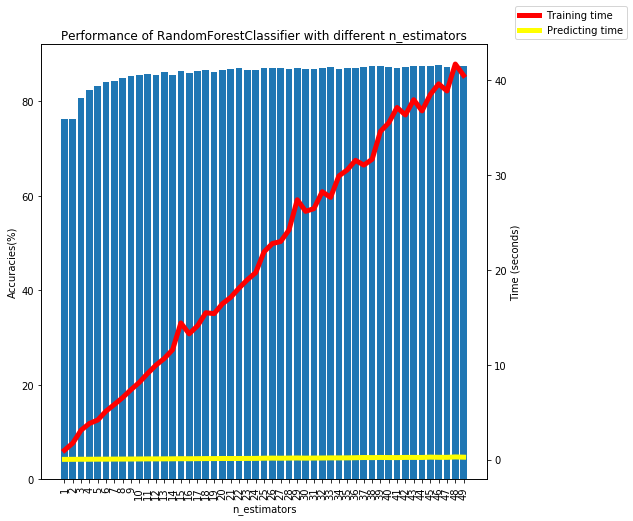

Average training time is 21.4s
Average accuracy is 85.9%


In [375]:
from sklearn.ensemble import RandomForestClassifier
def randomForest(N_estimators):
    return lambda: RandomForestClassifier(n_estimators=N_estimators)

benchmark_results = [benchmark(randomForest(i)) for i in range(1, 50)]
plot_graph("n_estimators", range(1, 50), "Performance of RandomForestClassifier with different n_estimators", 
           benchmark_results)

From the graph above, we can see that there is a strong positive relation between `n_estimators` with `training_time`. However, we can see that increasing `n_estimators` does did not actually raise the accuracy.  No wonder `sklearn` defaulted the value of `n_estimators` to 10.  Thus, brutally increasing `n_estimators` will only results in waste of time.

### Now, let us try with `criterion = 'entropy'`

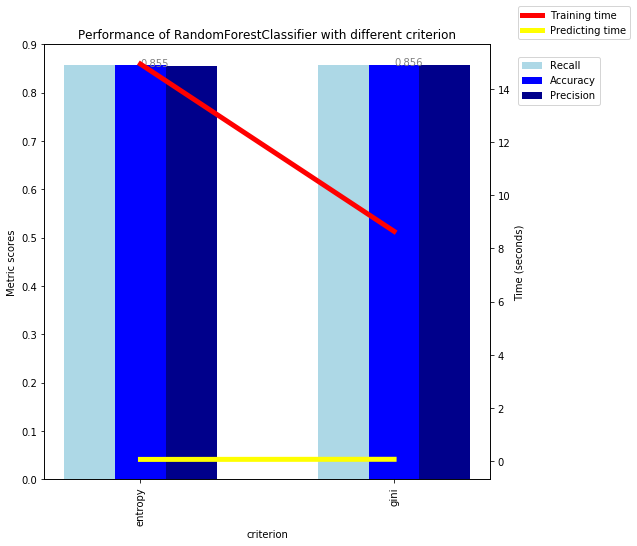

Average training time is 11.8s
Average precision is 0.856%
Max precision is 0.8560020934186631 when x=gini


In [215]:
results = [
    benchmark(lambda: RandomForestClassifier(criterion='entropy')),
    benchmark(lambda: RandomForestClassifier(criterion='gini'))
]
plot_graph("criterion", ['entropy', 'gini'], "Performance of RandomForestClassifier with different criterion", results)


From the graph we can see that the accuracy difference is not much, but obviously the training time is longer when we use `entropy` as the criterion. I think that this may be the reason why `gini` is the default criterion.  
The explanation (referred from [here](https://datascience.stackexchange.com/questions/10228/gini-impurity-vs-entropy)) is that entropy includes logarithmic calculation while gini does not, and since logarithmic function are computationaly expensive, it is clear that when we use entropy as criterion, the training time will be much longer than that of gini.

## 2. MLP Classifier
### Changing the number of hidden layer
For this classifier we will see if the number of hidden layers can affect the performance of the MLPClassifier.  
Note: We will use 100 neurons for each layer.

In [ ]:
from sklearn.neural_network import MLPClassifier

hidden_layer_counts = np.arange(1, 11, 1)

results = []
for n in hidden_layer_counts:
   results.append(benchmark(lambda: MLPClassifier(hidden_layer_sizes=((100,)*n))))

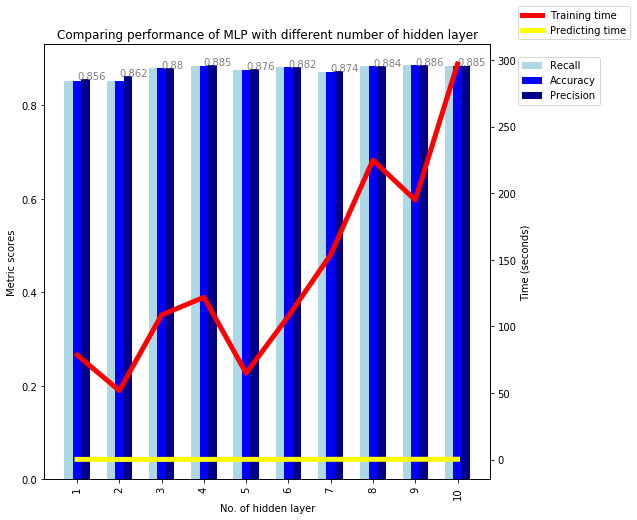

Average training time is 1.4e+02s
Average precision is 0.877%


In [138]:
CUT_POINT = 82
filtered_results = [x for x in results if x["accuracy"] > CUT_POINT]
filtered_hidden_layer_counts = [x for idx, x in enumerate(hidden_layer_counts) if results[idx]["accuracy"] > CUT_POINT ]


plot_graph("No. of hidden layer", hidden_layer_counts, "Comparing performance of MLP with different number of hidden layer", results)

From the graph above we can see that when the number of hidden layer(NOHL) reach 3, the accuracy increased by 3% at 88%, however further increment for NOHL doesn't seems to improved the accuracy anymore.  
Furthermore, we can see that the training time increases when we increase the NOHL.   
Thus, for future dicucssion we will use MLP with NOHL=3. since it has top accuracy with reasonable training time.

## Changing type of activation
In this section we will see if the type of activation will affect the performance of MLP.  
Note that we will use MLP with NOHL=3 since it is one of the best performing classifier we had ever used.

In [156]:
# Type of activation = {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}. Default is 'relu'
def activation_of(x):
    return lambda: MLPClassifier(hidden_layer_sizes=(100,100,100), activation=x)

benchmark_results = [
    benchmark(activation_of('identity')),
    benchmark(activation_of('logistic')),
    benchmark(activation_of('tanh')),
    benchmark(activation_of('relu'))
]   

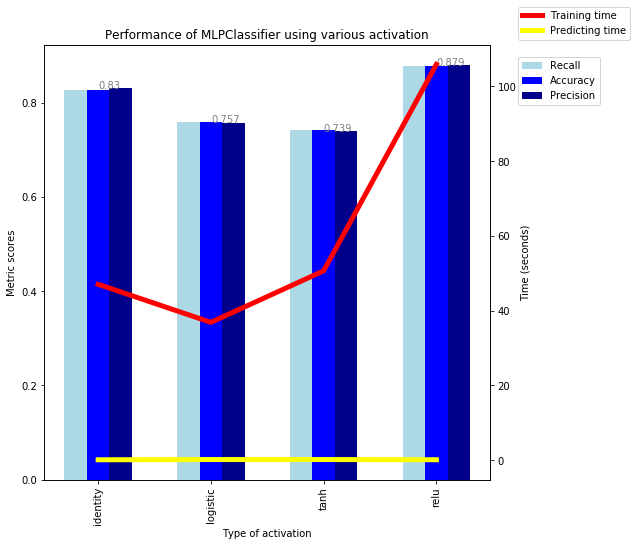

Average training time is 60.1s
Average precision is 0.801%


In [157]:
plot_graph("Type of activation", 
           ["identity", "logistic", "tanh", "relu"],
           "Performance of MLPClassifier using various activation",
           benchmark_results
          )

In this case, ReLU(rectified linear unit) outperform other type of classifier. If you want to understand the reason behind, you might want to check out this [paper](http://www.cs.toronto.edu/~fritz/absps/imagenet.pdf) written by Krizhevsky et al.

## Visualizing training of MLPClassifier
This section is purely for visualizing the loss of MLPClassifier at each iteration.

In [242]:
cls = MLPClassifier()
cls.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

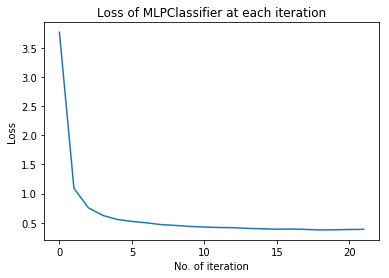

In [248]:
plt.plot(cls.loss_curve_)
plt.title("Loss of MLPClassifier at each iteration")
plt.ylabel("Loss")
plt.xlabel("No. of iteration")
plt.show()

#### Explanation about the graph
From the graph above, we can see that the loss decreases as the number of iteration increased.  
But *what the heck* is **LOSS**?  
We can imagine that loss means the mark he (the classifier) loss for every exam he takes.  
*What exam?*
When we train him, he will take an exam after some times of learning, and we will record down the mark he loss for the exam.  
Then, we will repeat this process over and over, that is why there is this term called **iteration**. It means how many times we repeat this process of learning and examining.  

Moreover, if we notice carefully, we can see that the loss stop decreasing even when the number of iteration increases, and this is why the training stops. It means that further training meaningless, because the classifier will not get smarter even if we keep on training him.

*But how do we decide when to stop?*  
There is a parameter called `tol` which means tolerance, in this case it is defaulted to `0.0001`. It means that if the last training(s) does not decrease the loss by more than `0.0001`, we will terminate the training session.


# Confusion matrices
In this section, we will be using MLPClassifier(with NOHL=3) to plot a confusion matrix to visualize what kind of data is confusing the classifier.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

cls = MLPClassifier(hidden_layer_sizes=((100,) * 3))
cls.fit(X_train, y_train)
predicted = cls.predict(X_test)
cf = confusion_matrix(y_test, predicted)

In [104]:
# The code below is copied from https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
def plot_confusion_matrix(conf_arr, labels):
    norm_conf = []
    for i in conf_arr:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    fig.set_size_inches(10, 10)
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                    interpolation='nearest')

    
    width, height = conf_arr.shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

    cb = fig.colorbar(res)
    ax.set_xticklabels(labels, rotation=90)
    plt.xticks(range(width), labels)
    plt.yticks(range(height), labels)
    plt.show()

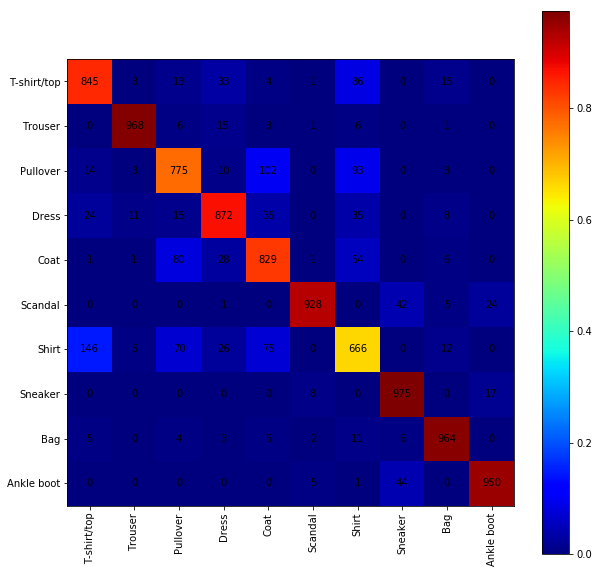

In [142]:
plot_confusion_matrix(cf, list(LABELS.values()))

From the confustion matrix above, *by analyzing the rows*, we can see that the prediction for Shirt is the worse, because about 50% of the data is mistaken as T-shirt, Pullover, Dress or Coat.  
Moreover, we can see that there 146 Shirt mispredicted as T-shirt. To be honest, even my eyes got confused between T-shirt and Shirt.  
Now, if we analyze the matrix by *columns*, we can see that if we are told by the classifier that a data represent a Shirt, we can't really trust it, because it mispredicted: 
    - 86 T-shirt as Shirt
    - 93 Pullover as Shirt
    - 54 Coat as Shirt
    
Therefore, we have to find a way for the classifier to learn specifically on how to differentiate Shirt from others since it is always confused with it.

## So, is there a way to fix this?
One approach is to retrain the classifier with those confusing data, but this method does not seems really efficient.  
Another method is to preprocess the data such as using normalization. By doing preprocessing, the data might be in a  better shape for classification.

## Preprocessing : Normalizing data

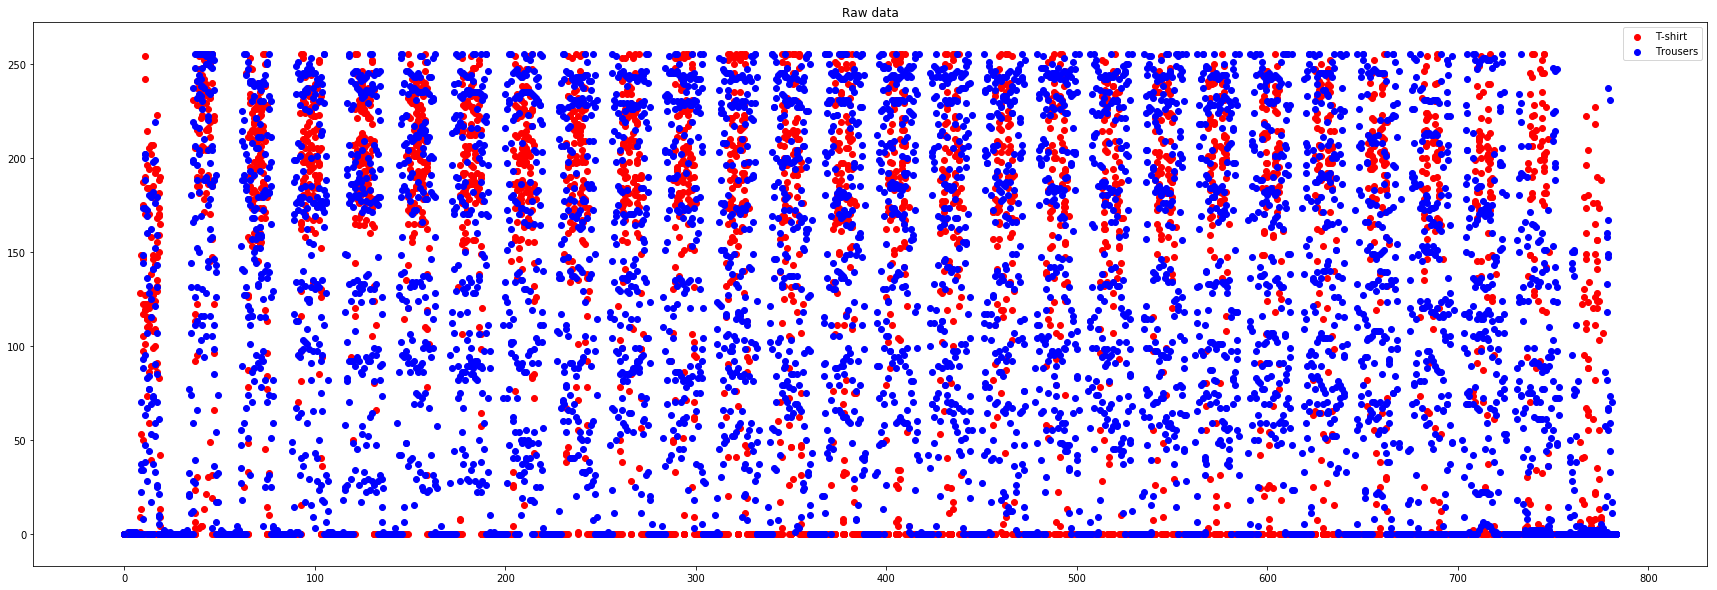

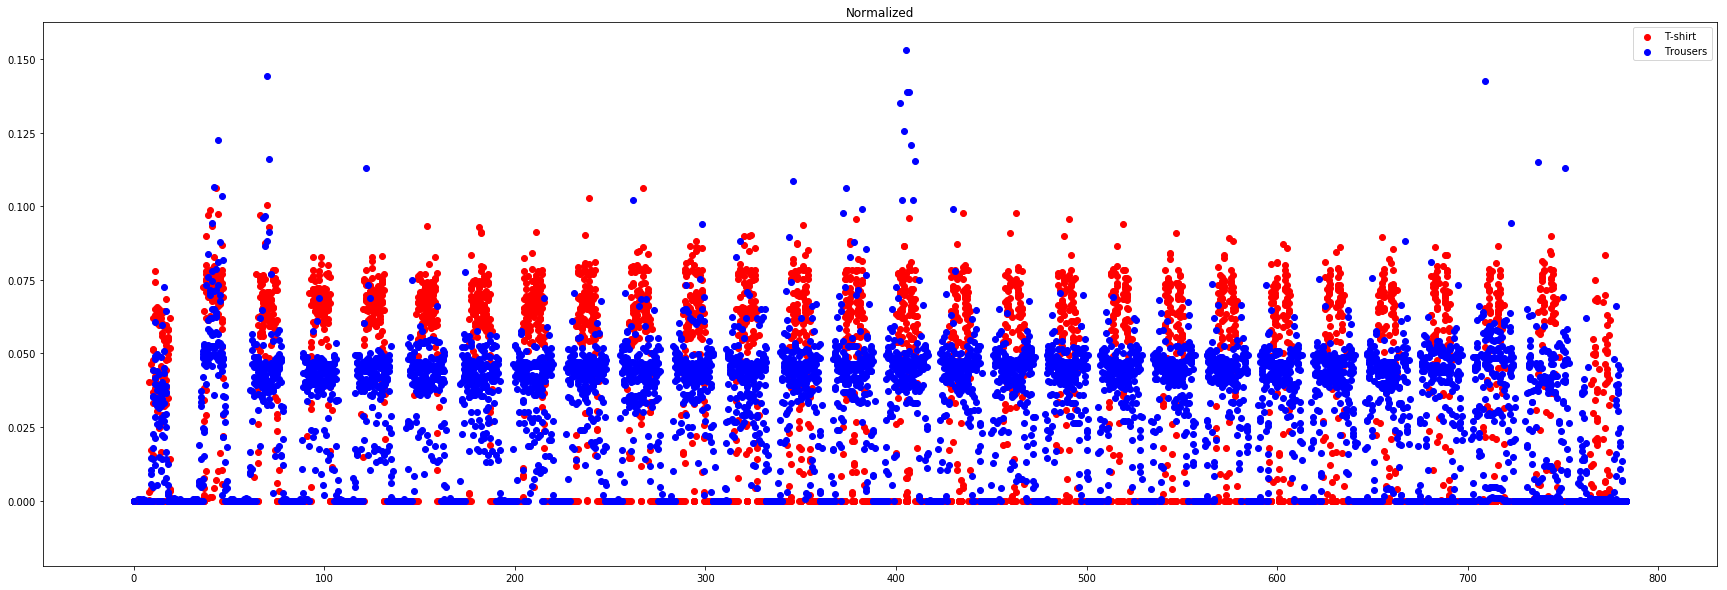

In [119]:
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

def plot_pixels(title, normalizer=None): 
    sample_x = X_train[1:100]
    sample_y = y_train[1:100]
    colors = ['red', 'blue']
    for i in [1, 2]:
        sample = sample_x[np.argwhere(sample_y == i).flatten()]
        if normalizer is not None:
            sample = n.transform(sample)
        for x in sample:
            plt.scatter(range(len(x)), x, color=colors[i - 1])
        plt.gcf().set_size_inches(30, 10)
        plt.title(title)
   
    line1 = plt.scatter([0, 0], [0, 0], color='red')
    line2 = plt.scatter([0, 0], [0, 0], color='blue')
    plt.legend((line1, line2), ('T-shirt', 'Trousers'))
    plt.show()

plot_pixels("Raw data")
plot_pixels("Normalized", Normalizer())

From the graph above, we can see that in raw data, it is quite hard to differentiate the pixels between T-shirt and Trousers. However, after we apply normalization on the data, we can see that it is easier to do the differentiation.  
Thus, we may **hypothesize** that the classifier can work better if they were trained with normalized data.  


Now, we will validate this hypothesis by using MLP(where number of hidden layer = 3).

In [150]:
from sklearn.preprocessing import Normalizer
normalized_x_train = Normalizer().fit_transform(X_train, y_train)
normalized_x_test = Normalizer().fit_transform(X_test, y_test)
cls = MLPClassifier(hidden_layer_sizes=(100, 100, 100))
benchmark_result = benchmark(lambda: cls, normalized_x_train, normalized_x_test)
print_benchmark_result(benchmark_result)

Training data using  MLPClassifier
Time elapsed for training   =  0:08:12.230795
Time elapsed for prediction =  0:00:01.268468
Accuracy = 0.8818
Precision = 0.883203013040196
Recall = 0.8818


Unfortunately, the precision does not seems to improved (which is the same old 88%), not only that, the training time increased by 4 times!  
Thus, we can see that the **hypothesis** have failed when we use MLPClassifier.

## Training classifier with various preproccessed data
In this case we will try to train the RandomForestClassifier with data preprocessed by various preprocessors.

In [121]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.ensemble import RandomForestClassifier

def train(preprocessor=None):
    my_X_train = X_train
    my_X_test = X_test
    if preprocessor is not None:
        my_X_train = preprocessor().fit_transform(X_train, y_train)
        my_X_test  = preprocessor().fit_transform(X_test, y_test)
    return benchmark(RandomForestClassifier, my_X_train, my_X_test)

r1 = train()
r2 = train(Normalizer)
r3 = train(MinMaxScaler)
r4 = train(MaxAbsScaler)
r5 = train(StandardScaler)
r6 = train(RobustScaler)

/home/hou32hou/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/hou32hou/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


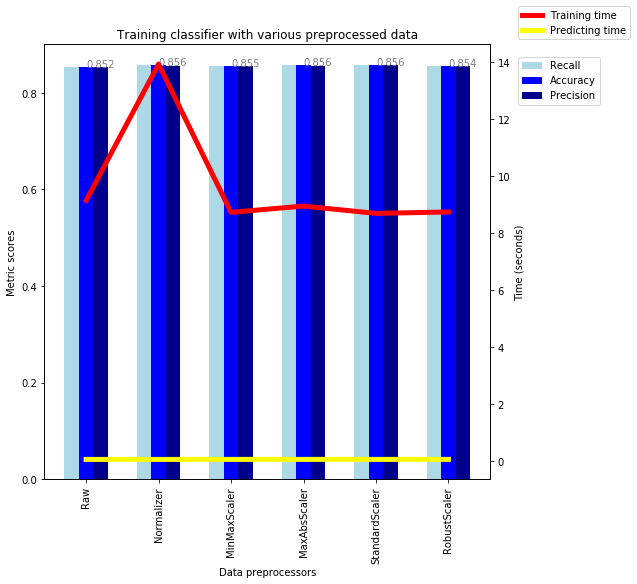

Average training time is 9.71s
Average precision is 0.855%
Max precision is 0.8563131706004473 when x=StandardScaler


In [124]:
benchmark_results = [r1, r2, r3, r4, r5, r6] 
plot_graph("Data preprocessors", [
    "Raw",
    "Normalizer",
    "MinMaxScaler",
    "MaxAbsScaler",
    "StandardScaler",
    "RobustScaler"
], "Training classifier with various preprocessed data", benchmark_results)

Unfortunately, from the graph, our hypothesis is not really true (when using RandomForestClassifier), because the accuracy doesn't seems to improve even if we train that classifier with preprocessed data.   Moreover, if the data is preprocess with Normalizer the, training time increases by more than 50%.

## Binarizing the data
In this section we will binarized the training data (as suggested by my friend, Dheeno), that means all pixel that have weight of more than a specified cutting point, we will converted into 1. 
Then we will if this we improve the performance of the classifier.

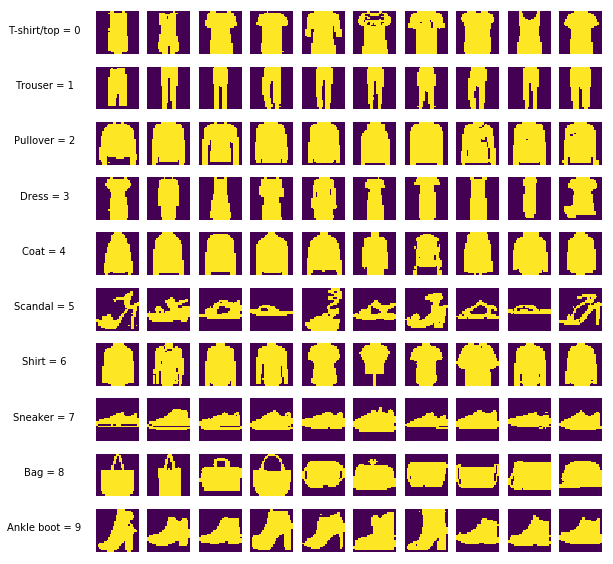

In [80]:
def binarize(data, cutting_point):
    data[data <= cutting_point] = 0
    data[data > cutting_point] = 1

X_train_binarized = np.array(X_train, copy=True)
binarize(X_train_binarized, 9)
plot_data_image(X_train_binarized)

In [209]:
benchmark_results = []
for cutting_point in range(0, 255):
    X_train_binarized = np.array(X_train, copy=True)
    binarize(X_train_binarized, cutting_point)
    X_test_binarized = np.array(X_test, copy=True)
    binarize(X_test_binarized, cutting_point)
    r = benchmark(RandomForestClassifier, X_train_binarized, X_test_binarized)
    benchmark_results.append(r)

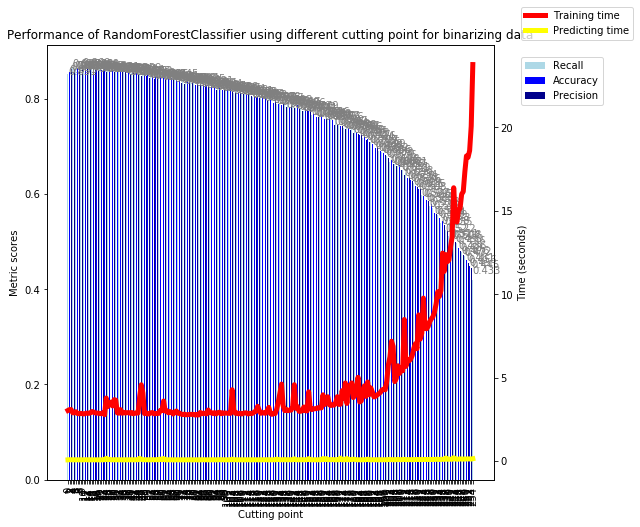

Average training time is 4.73s
Average precision is 0.755%
Max precision is 0.8690345586692987 when x=9


In [212]:
plot_graph("Cutting point",
    range(0, 255), 
    "Performance of RandomForestClassifier using different cutting point for binarizing data",
    benchmark_results
)

From the graph above, we can see that the precision decreases as the cutting point increases, it means that the data become more and more undistinguishable.
Since the precision is highest when the cutting point is 9, now let's try it with MLPClassifier


In [241]:
cutting_point = 9
X_train_binarized = np.array(X_train, copy=True)
binarize(X_train_binarized, cutting_point)
X_test_binarized = np.array(X_test, copy=True)
binarize(X_test_binarized, cutting_point)
r = benchmark(lambda: MLPClassifier(hidden_layer_sizes=((100,) * 3)),
              normalized_x_train, normalized_x_test)
print_benchmark_result(r)

Training data using  MLPClassifier
Time elapsed for training   =  0:05:17.644455
Time elapsed for prediction =  0:00:00.856903
Accuracy = 0.8883
Precision = 0.8879439361492432
Recall = 0.8883


From the results above, we can see that the precision did improve, but not really promising, because it only increased about 0.003 from the last best result we got, which is 0.885.

## Last note
I think I'm stuck at 0.885 precision for now, because no matter what method I tried, it seems to top around 0.88 only.  
The methods I tried are:
- Tuning the parameters
- Normalizing the data
- Binarizing the data

To be frank, this precision is actually already better than human performance which is 0.835 (documented in README.md of fashion-mnist repo).

In my opinion, I think the reason why I couldn't get more precision is because the library I used, which is Scikit-Learn. This library is actually not meant for production purposes, as mentioned officialy at [here](http://scikit-learn.org/stable/modules/neural_networks_supervised.html).

Therefore, if I would be given more time, I would really like to try out library like Keras or Tensorflow or PyTorch, because all the documented benchmark that have more than 90% accuracy seems to be using these libraries. Moreover, this library will allow me to use Batch Normalization and Deep Learning. 

Anyway, I really did learn a lot about Neural networks(NN), and how it works and stuff.  
And I did find some [interesting readings](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw) regarding NN, it is said that until now nobody know exactly how many layers of hidden layer and how many neurons for each layer will be optimum for a model, thus we can only find out the best combination using **trial and error**.  

   Thus, I felt like machine learning is kind of like playing lottery, because I need to guess the correct combination of parameter in order to have a better model. Seriously if I have more computational power I would try every possible parameter combination for MLPClassifier.
   
   Another interesting fact is that nobody really knows why more hidden layer (which they call *deep learning*) will result in a better model. Because in theory, 2 or 3 hidden layers are enough to model any non-linear classification problem.

In my opinion, this deep learning mystery can be related to [an article written by Mandelbrot](http://users.math.yale.edu/~bbm3/web_pdfs/howLongIsTheCoastOfBritain.pdf). In this article, he asked "**How long is the coast of Britain?**", and it turns out that there are not definitive answer, because the output depends on the measuring tool you use, for example, if you use a 1-meter ruler and a 1-cm ruler to measure the length of the coast, you will find that the measurement done with the smaller ruler will result in a longer length.

Therefore I believe that using more hidden layers means to use a smaller measuring tools, which can helps to draw a smoother line between each points to be classified.
    
    